# Robust Scaler

* Use this transform if your data has outliers
* Robust Scaler scales data using median and IQR (interquartile range)
  * Median and IQR are robust to outliers
  * Standard scaling won't work as mean and standard deviation are affected by heavy skew

In [9]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import RobustScaler, StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

### Create dataset

* Draw 30 random data points from a normal distribution

In [2]:
# 30 random points from normal distribution
data = np.random.normal(0, 15, 30)
data_df = pd.DataFrame({"data":data})

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


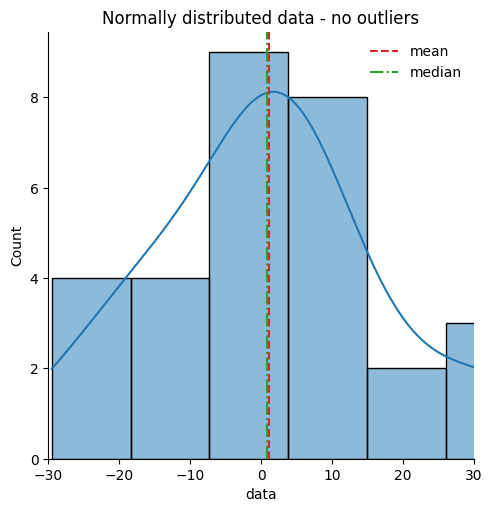

In [3]:
# Plot data points
sns.displot(data_df, x="data", kde=True)  
plt.xlim([-30, 30])
plt.title("Normally distributed data - no outliers")
plt.axvline(x=data_df['data'].mean(), c='tab:red', linestyle='--', label='mean')
plt.axvline(x=data_df['data'].median(), c='tab:green', linestyle='-.', label='median')
plt.legend(frameon=False)
plt.show()

### Add outliers

* Add 5 outliers

In [4]:
# 5 outliers from range 240 to 250
outliers = np.random.uniform(240, 250, 5)

# Add outliers to our dataset
data_df = pd.DataFrame({
    "data": np.append(data, outliers)
})

In [5]:
data_df['data'].median()

4.477878432355385

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


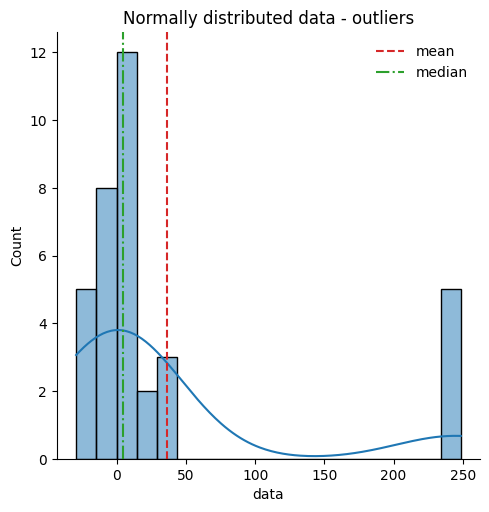

In [6]:
# Plot data points
sns.displot(data_df, x="data", kde=True)  
plt.title("Normally distributed data - outliers")
plt.axvline(x=data_df['data'].mean(), c='tab:red', linestyle='--', label='mean')
plt.axvline(x=data_df['data'].median(), c='tab:green', linestyle='-.', label='median')
plt.legend(frameon=False)
plt.show()

### Transform outlier data

* Robust scaler
* Standard scaler
* Compare scalers

In [21]:
# Robust scaler
robust_scaler = RobustScaler()

# Scale all data points using median and IQR
robust_scaled_data = robust_scaler.fit_transform(data_df)
robust_df = pd.DataFrame({
    'Scaled Values': robust_scaled_data.reshape(-1),
    'Scaler': 'Robust'
})

# Standard scaler
standard_scaler = StandardScaler()

# Scale all data points using mean and standard deviation
standard_scaled_data = standard_scaler.fit_transform(data_df)
standard_df = pd.DataFrame({
    'Scaled Values': standard_scaled_data.reshape(-1),
    'Scaler': 'Standard'
})


# Dataframe with both standard and robust scaled values
scaled_values = pd.concat([robust_df, standard_df], ignore_index=True)


### Conclusions

* Outliers adversely affect the standard scaler
  * Standard scaler uses the mean and standard deviation of the dataset
  * Outliers stretch your distribution and inflate the standard deviation
  * Some outliers will not be detected due to the large standard deviation
* Robust scaler has a wider range of values than the standard scaler
  * Robust scaler uses the median and IQR
  * Outliers have less effect on the robust scaler

/home/codespace/.local/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


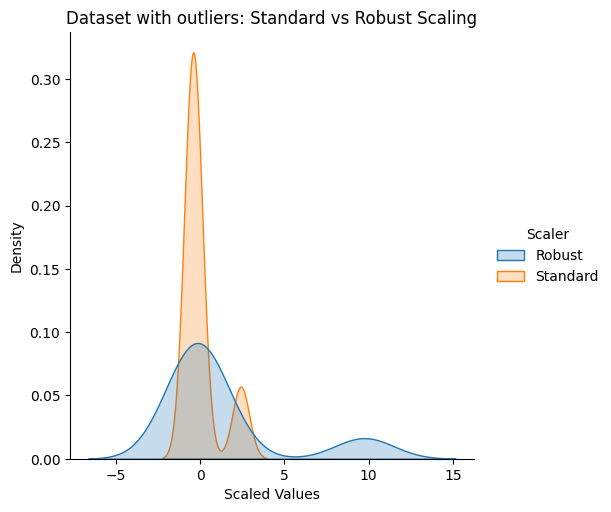

In [24]:
sns.displot(scaled_values, x="Scaled Values", hue="Scaler", kind="kde", fill=True)
plt.title('Dataset with outliers: Standard vs Robust Scaling')
plt.show()